In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load packages
Let's load the required packages. 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload 

#np.set_printoptions(threshold=np.nan)

In [ ]:
FRmodel = faceRecoModel(input_shape=(3, 96, 96))

In [ ]:
print("Total Params:", FRmodel.count_params())

Total Params: 3743280


In [ ]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    # Step 1: Compute the (encoding) distance between the anchor and the positive
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))    
    return loss

In [ ]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [ ]:
#FRmodel.summary()

## 3 - Applying the model

### 3.1 - Face Verification

Let's build a database containing one encoding vector for each person who is allowed to enter the office. To generate the encoding we use `img_to_encoding(image_path, model)`, which runs the forward propagation of the model on the specified image. 

Run the following code to build the database (represented as a python dictionary). This database maps each person's name to a 128-dimensional encoding of their face.

In [ ]:
database = {}
database["Roshan"] = img_to_encoding("/content/drive/My Drive/Gov-thon/Face Recognition/images/roshan_train.jpeg", FRmodel)
database["Sundeep"] = img_to_encoding("/content/drive/My Drive/Gov-thon/Face Recognition/images/agastya_train.jpeg", FRmodel)
database["Abhinav"] = img_to_encoding("/content/drive/My Drive/Gov-thon/Face Recognition/images/abhinav_train.jpeg", FRmodel)
database["Teja"] = img_to_encoding("/content/drive/My Drive/Gov-thon/Face Recognition/images/teja_train.jpeg", FRmodel)
database["Uday"] = img_to_encoding("/content/drive/My Drive/Gov-thon/Face Recognition/images/uday_train.jpeg", FRmodel)
#database["dan"] = img_to_encoding("/content/images/dan.jpg", FRmodel)
#database["sebastiano"] = img_to_encoding("/content/images/sebastiano.jpg", FRmodel)
#database["bertrand"] = img_to_encoding("/content/images/bertrand.jpg", FRmodel)
#database["kevin"] = img_to_encoding("/content/images/kevin.jpg", FRmodel)
#database["felix"] = img_to_encoding("/content/images//felix.jpg", FRmodel)
#database["benoit"] = img_to_encoding("/content/images//benoit.jpg", FRmodel)
#database["arnaud"] = img_to_encoding("/content/images//arnaud.jpg", FRmodel)
#database["keanu"] = img_to_encoding("/content/images//Keanu_train.jpg",FRmodel)

In [ ]:
def verify(image_path, identity, database, model):   
    # Step 1: Compute the encoding for the image. Use img_to_encoding() see example above. (≈ 1 line)
    encoding = img_to_encoding(image_path, model)
    
    # Step 2: Compute distance with identity's image (≈ 1 line)
    dist = float(np.linalg.norm(encoding - database[identity]))
    
    # Step 3: Open the door if dist < 0.7, else don't open (≈ 3 lines)
    if dist < 0.6:
        print("It's " + str(identity) + ", Access granted!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", Access denied!")
        door_open = False       
    print(dist)
    #print(door_open)

#Test

It's Roshan, Access granted!
0.5754094123840332


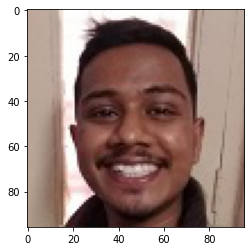

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image as im
path = "/content/drive/My Drive/Gov-thon/Face Recognition/images/roshan_test.jpeg"
verify(path, "Roshan", database, FRmodel)
import matplotlib.image as mpimg
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

It's not Roshan, Access denied!
0.820566713809967


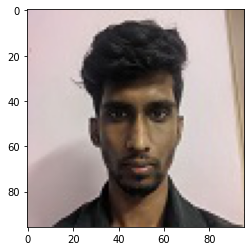

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image as im
path = "/content/drive/My Drive/Gov-thon/Face Recognition/images/agastya_test.jpeg"
verify(path, "Roshan", database, FRmodel)
import matplotlib.image as mpimg
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()